In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns

In [121]:
df = pd.read_csv('~/Desktop/ML/Algerian_forest_fires_dataset_UPDATE.csv')

In [122]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [123]:
df.shape

(247, 14)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


# DATA CLEANING

In [125]:
df.isnull().sum()

day            1
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
dtype: int64

In [126]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [127]:
df.drop([122,123],axis=0,inplace=True)

In [128]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [129]:
df.loc[:122,"Region"]=0
df.loc[122:,"Region"]=1

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          245 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       245 non-null    float64
dtypes: float64(1), object(14)
memory usage: 38.7+ KB


In [131]:
df['Region'] = df['Region'].astype('int')

In [132]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [133]:
df = df.dropna().reset_index(drop=True)

In [134]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [135]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [136]:
df=df.drop(122).reset_index(drop=True)

In [137]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [138]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [139]:
# Remove spaces from column names
df.columns = df.columns.str.strip()

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4   RH           243 non-null    object
 5   Ws           243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int32 
dtypes: int32(1), object(14)
memory usage: 27.7+ KB


In [141]:
# Change data types (required cols as integers, Month,year,temperature,rh,ws)
df[['month','day','year','Temperature','RH','Ws']] = df[['month','day','year','Temperature','RH','Ws']].astype('int')

In [142]:
object_columns = df.select_dtypes(include=['object']).columns

In [143]:
object_columns

Index(['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'], dtype='object')

In [144]:
for i in object_columns:
    if i !='Classes':
        df[i]=df[i].astype('float')

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 22.0+ KB


In [146]:
data = df.drop(columns=['day','month','year'],axis=1)

In [147]:
data.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [148]:
data['Classes']= np.where(data['Classes'].str.contains("not fire"),0,1)

In [149]:
data['Classes'].value_counts()

1    137
0    106
Name: Classes, dtype: int64

In [150]:
percentage=data.Classes.value_counts(normalize=True)*100
percentage

1    56.378601
0    43.621399
Name: Classes, dtype: float64

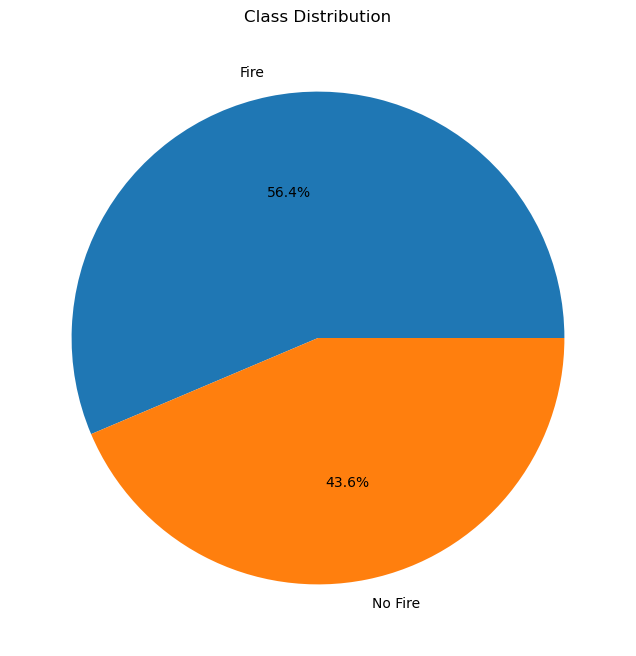

In [151]:


class_lables = ["Fire","No Fire"]
plt.figure(figsize=(12,8))
plt.pie(percentage,labels=class_lables,autopct='%1.1f%%')
plt.title("Class Distribution")
plt.show()

In [152]:
data.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


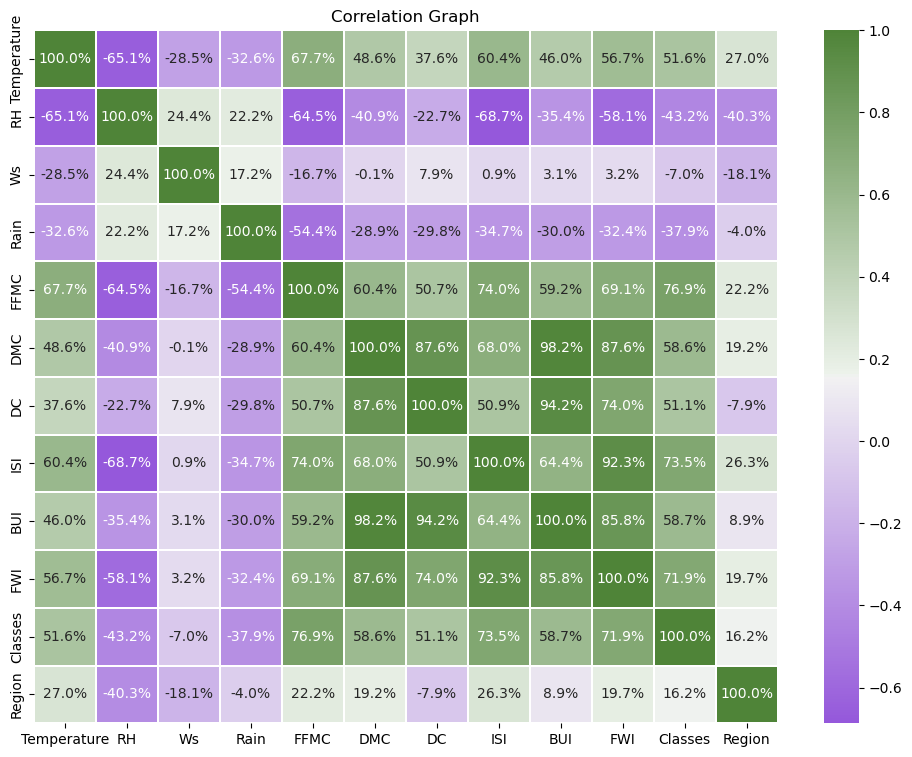

In [153]:
plt.figure(figsize=(12, 9))

plt.title("Correlation Graph")

cmap = sns.diverging_palette( 1000,120, as_cmap=True)
sns.heatmap(data.corr(), annot=True, fmt='.1%',  linewidths=.05, cmap=cmap);

In [154]:
data['Classes'].unique()

array([0, 1])

In [155]:
data['Classes']

0      0
1      0
2      0
3      0
4      0
      ..
238    1
239    0
240    0
241    0
242    0
Name: Classes, Length: 243, dtype: int32

In [156]:
data.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [157]:
prediction_feature = ['Temperature','RH','Ws','Rain','FFMC','DMC','DC','ISI','BUI','FWI','Region']

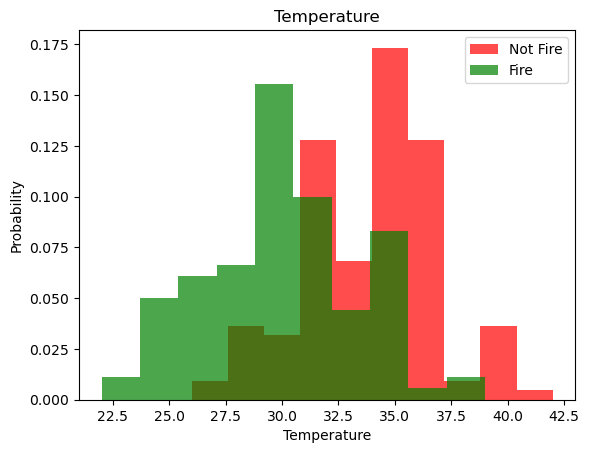

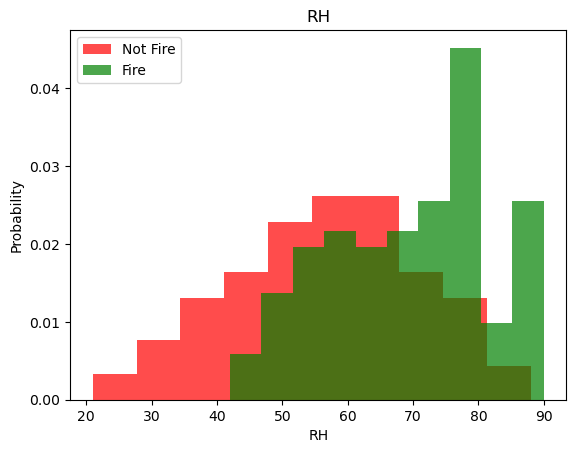

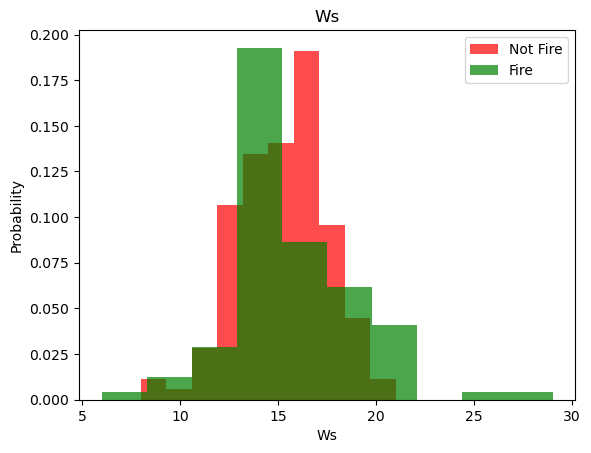

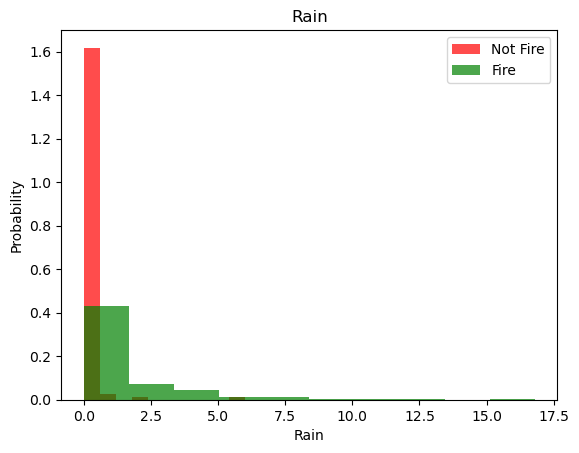

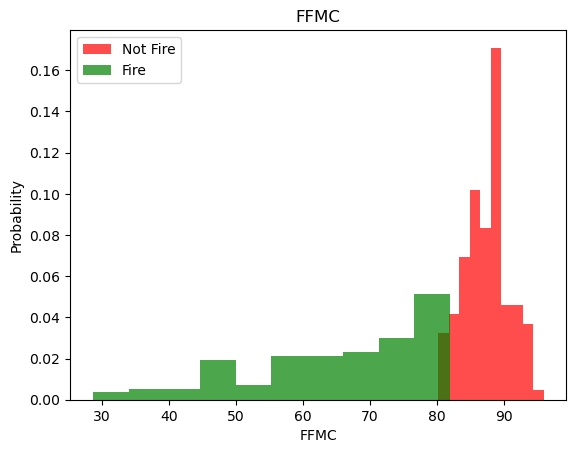

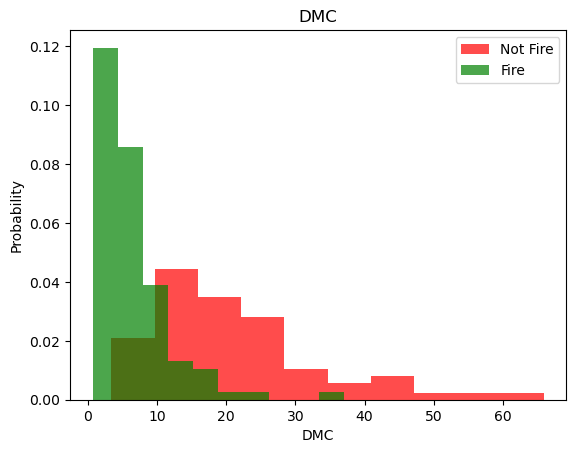

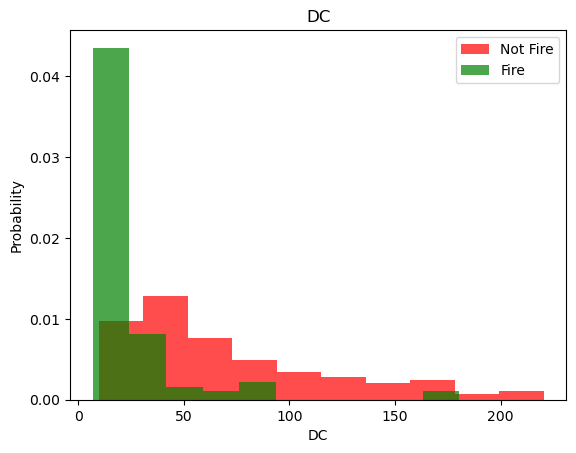

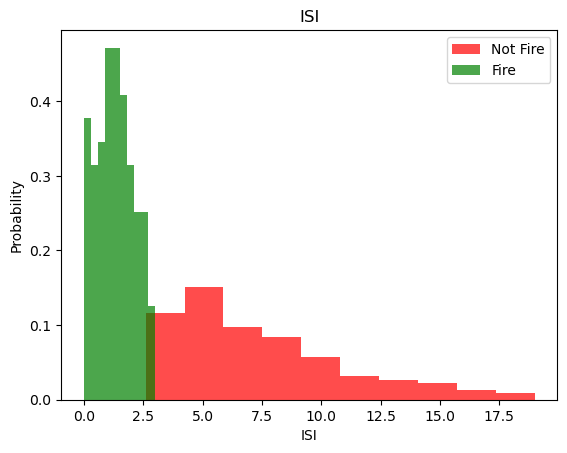

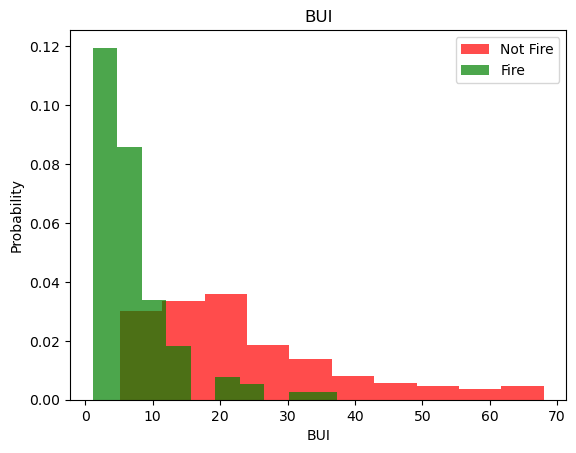

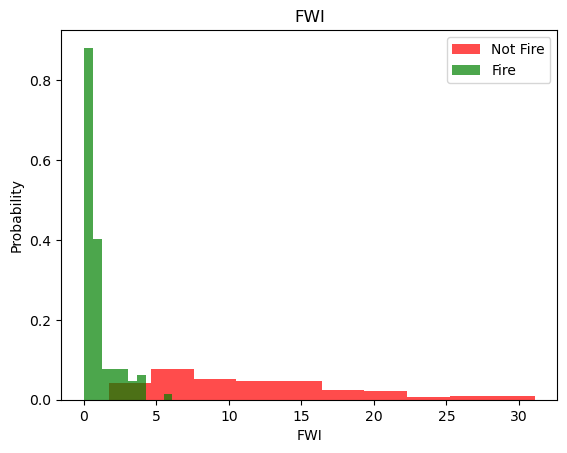

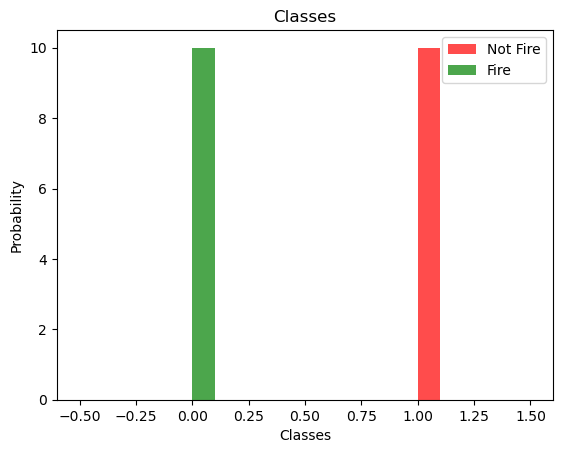

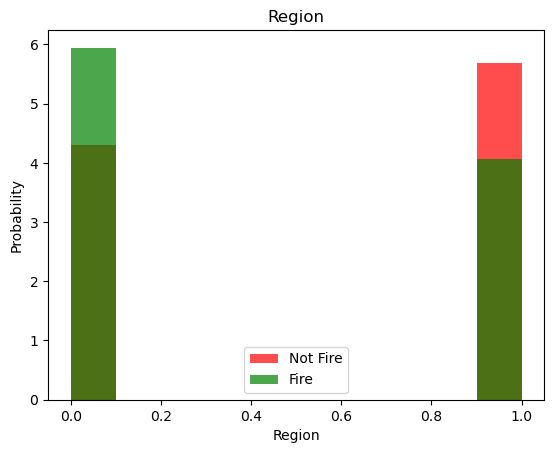

In [158]:
import matplotlib.pyplot as plt


cols = data.columns

for label in data[:]:
    plt.hist(data[data['Classes'] == 1][label], color='red', label='Not Fire', alpha=0.7, density=True)
    plt.hist(data[data['Classes'] == 0][label], color='green', label='Fire', alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel('Probability')
    plt.xlabel(label)
    plt.legend()
    plt.show()

# Train , Validation and Test Datasets

In [165]:
train,valid,test =np.split(data.sample(frac=1),[int(0.6*len(data)),int(0.8*len(data))])

In [160]:
def scale_dataset(dataframe, oversample=False):
    # Extracting features (x) and target variable (y)
    prediction_features = ['Temperature','RH','Ws','Rain','FFMC','DMC','DC','ISI','BUI','FWI','Region']
    x = dataframe[prediction_features].values

    target_column = 'Classes'
    y = dataframe[target_column].values
    
    # Scaling features
    scaler = StandardScaler()
    x_scaled = scaler.fit_transform(x)
    
    # Oversample if specified
    if oversample:
        ros = RandomOverSampler(random_state=42)  # Set a random_state for reproducibility
        x_scaled, y = ros.fit_resample(x_scaled, y)
    
    # Concatenate x_scaled and y
    data = np.hstack((x_scaled, np.reshape(y, (-1, 1))))
    
    return data, x_scaled, y

In [161]:
train , x_train, y_train = scale_dataset(train, oversample=True)

In [162]:
len(y_train)

156

In [163]:
print(len(x_train))

156


In [166]:
train_data, x_train, y_train = scale_dataset(train, oversample=True)
valid_data, x_valid, y_valid = scale_dataset(valid, oversample=False)
test_data, x_test, y_test = scale_dataset(test, oversample=False)


# Classification

# 1.kNN Model

In [167]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing

In [168]:
knn_model = KNeighborsClassifier(n_neighbors=5)
clf = knn_model.fit(x_train, y_train)

In [169]:
# Define the number of folds (k = 10 for 10-fold cross-validation)
num_folds = 10

# Create a KFold object
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform 10-fold cross-validation
cv_scores = cross_val_score(clf, x_train, y_train, cv=kf, scoring='accuracy')

# Display the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate and display the mean accuracy
mean_accuracy = np.mean(cv_scores)
print("Mean Accuracy:", mean_accuracy)

Cross-validation scores: [1.         0.76470588 0.9375     0.9375     0.9375     0.875
 0.8125     0.8125     0.75       0.9375    ]
Mean Accuracy: 0.8764705882352942


In [170]:
y_pred = knn_model.predict(x_test)

In [171]:
y_pred

array([0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1])

In [172]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92        23
           1       0.96      0.88      0.92        26

    accuracy                           0.92        49
   macro avg       0.92      0.92      0.92        49
weighted avg       0.92      0.92      0.92        49



In [173]:
len(data)

243

In [174]:
from sklearn.metrics import roc_curve, auc


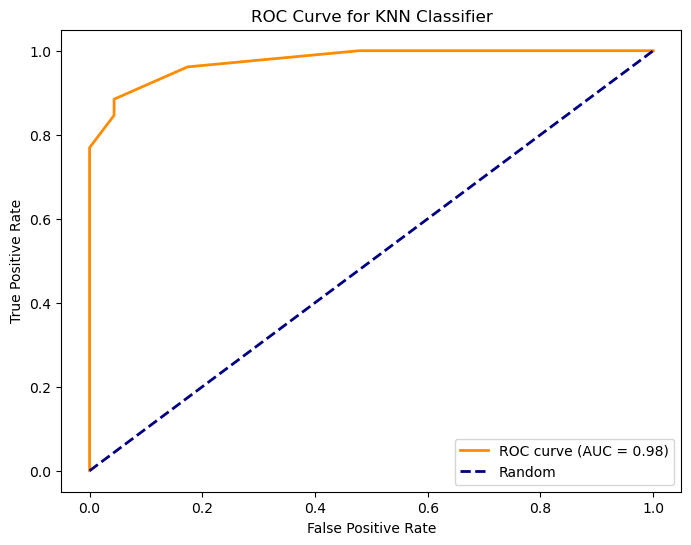

In [175]:
# Get predicted probabilities for the positive class
y_prob = knn_model.predict_proba(x_test)[:, 1]

# Computing ROC curve and area under the curve (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN Classifier')
plt.legend(loc='lower right')
plt.show()

In [176]:
data.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


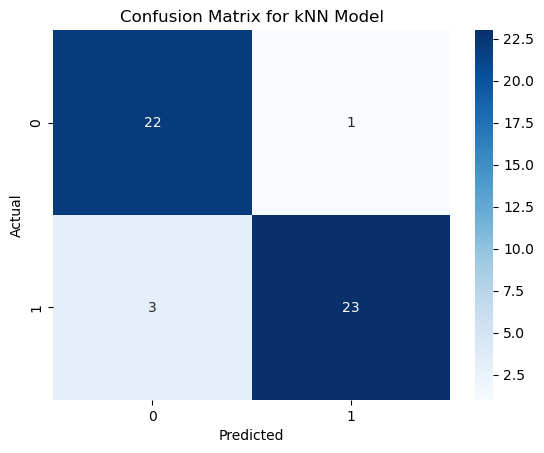

In [177]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Confusion Matrix for kNN Model')
plt.show()

# 2.Naive Bayes Model

In [178]:
from sklearn.naive_bayes import GaussianNB

In [179]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
   
# making predictions on the testing set
y_pred = gnb.predict(x_test)
   
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 93.87755102040816


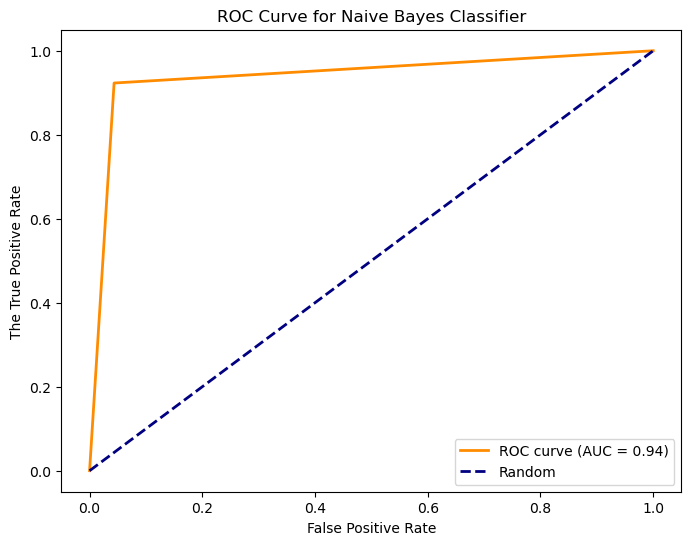

In [180]:
# making predictions on the testing set
y_pred = gnb.predict(x_test)

# Computing ROC curve and area under the curve (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('The True Positive Rate')
plt.title('ROC Curve for Naive Bayes Classifier')
plt.legend(loc='lower right')
plt.show()

In [181]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        23
           1       0.96      0.92      0.94        26

    accuracy                           0.94        49
   macro avg       0.94      0.94      0.94        49
weighted avg       0.94      0.94      0.94        49



In [182]:
# Define the number of folds (k = 10 for 10-fold cross-validation)
num_folds = 10

# Create a KFold object
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform 10-fold cross-validation
cv_scores = cross_val_score(gnb, x_train, y_train, cv=kf, scoring='accuracy')

# Display the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate and display the mean accuracy
mean_accuracy = np.mean(cv_scores)
print("Mean Accuracy:", mean_accuracy)

Cross-validation scores: [1.         0.88235294 0.9375     0.9375     0.9375     0.8125
 0.875      0.9375     0.875      0.9375    ]
Mean Accuracy: 0.9132352941176471


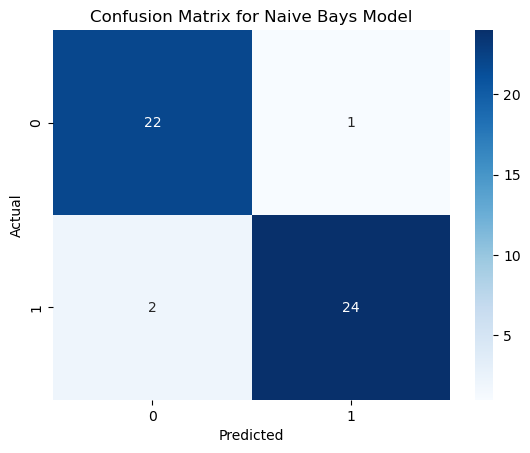

In [183]:
cm=confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Confusion Matrix for Naive Bays Model')
plt.show()

# 3. DecisionTree Classifier

In [184]:
from sklearn.tree import DecisionTreeClassifier




In [185]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9591836734693877


In [186]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        23
           1       0.93      1.00      0.96        26

    accuracy                           0.96        49
   macro avg       0.96      0.96      0.96        49
weighted avg       0.96      0.96      0.96        49



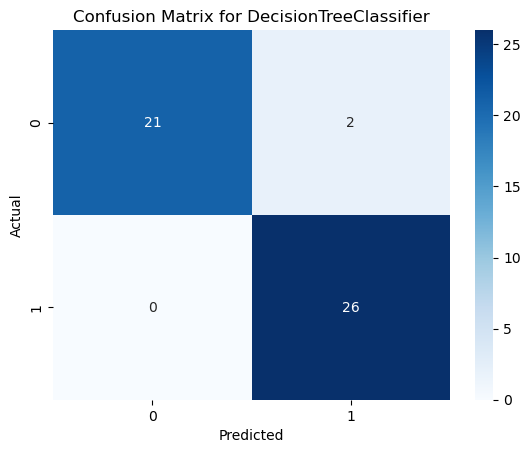

In [187]:
cm=confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Confusion Matrix for DecisionTreeClassifier')
plt.show()

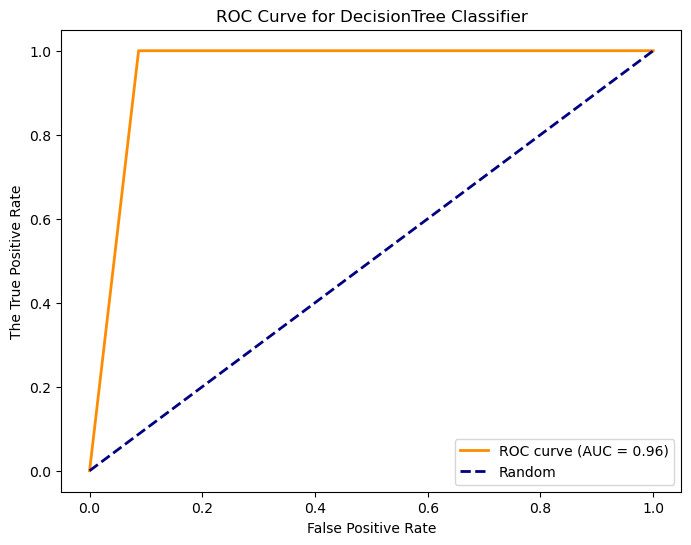

In [188]:


# Compute ROC curve and area under the curve (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('The True Positive Rate')
plt.title('ROC Curve for DecisionTree Classifier')
plt.legend(loc='lower right')
plt.show()

In [189]:
# Define hyperparameters to tune
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [190]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [191]:
from sklearn.model_selection import RandomizedSearchCV

# Replace GridSearchCV with RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=clf, param_distributions=param_grid, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1)
random_search.fit(x_train, y_train)

# Get the best parameters and model
best_params = random_search.best_params_
best_clf = random_search.best_estimator_

# Evaluate the performance of the best model on the test set
y_pred = best_clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Hyperparameters: {best_params}")
print(f"Accuracy on Test Set: {accuracy:.2f}")


Best Hyperparameters: {'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 5, 'criterion': 'gini'}
Accuracy on Test Set: 0.96


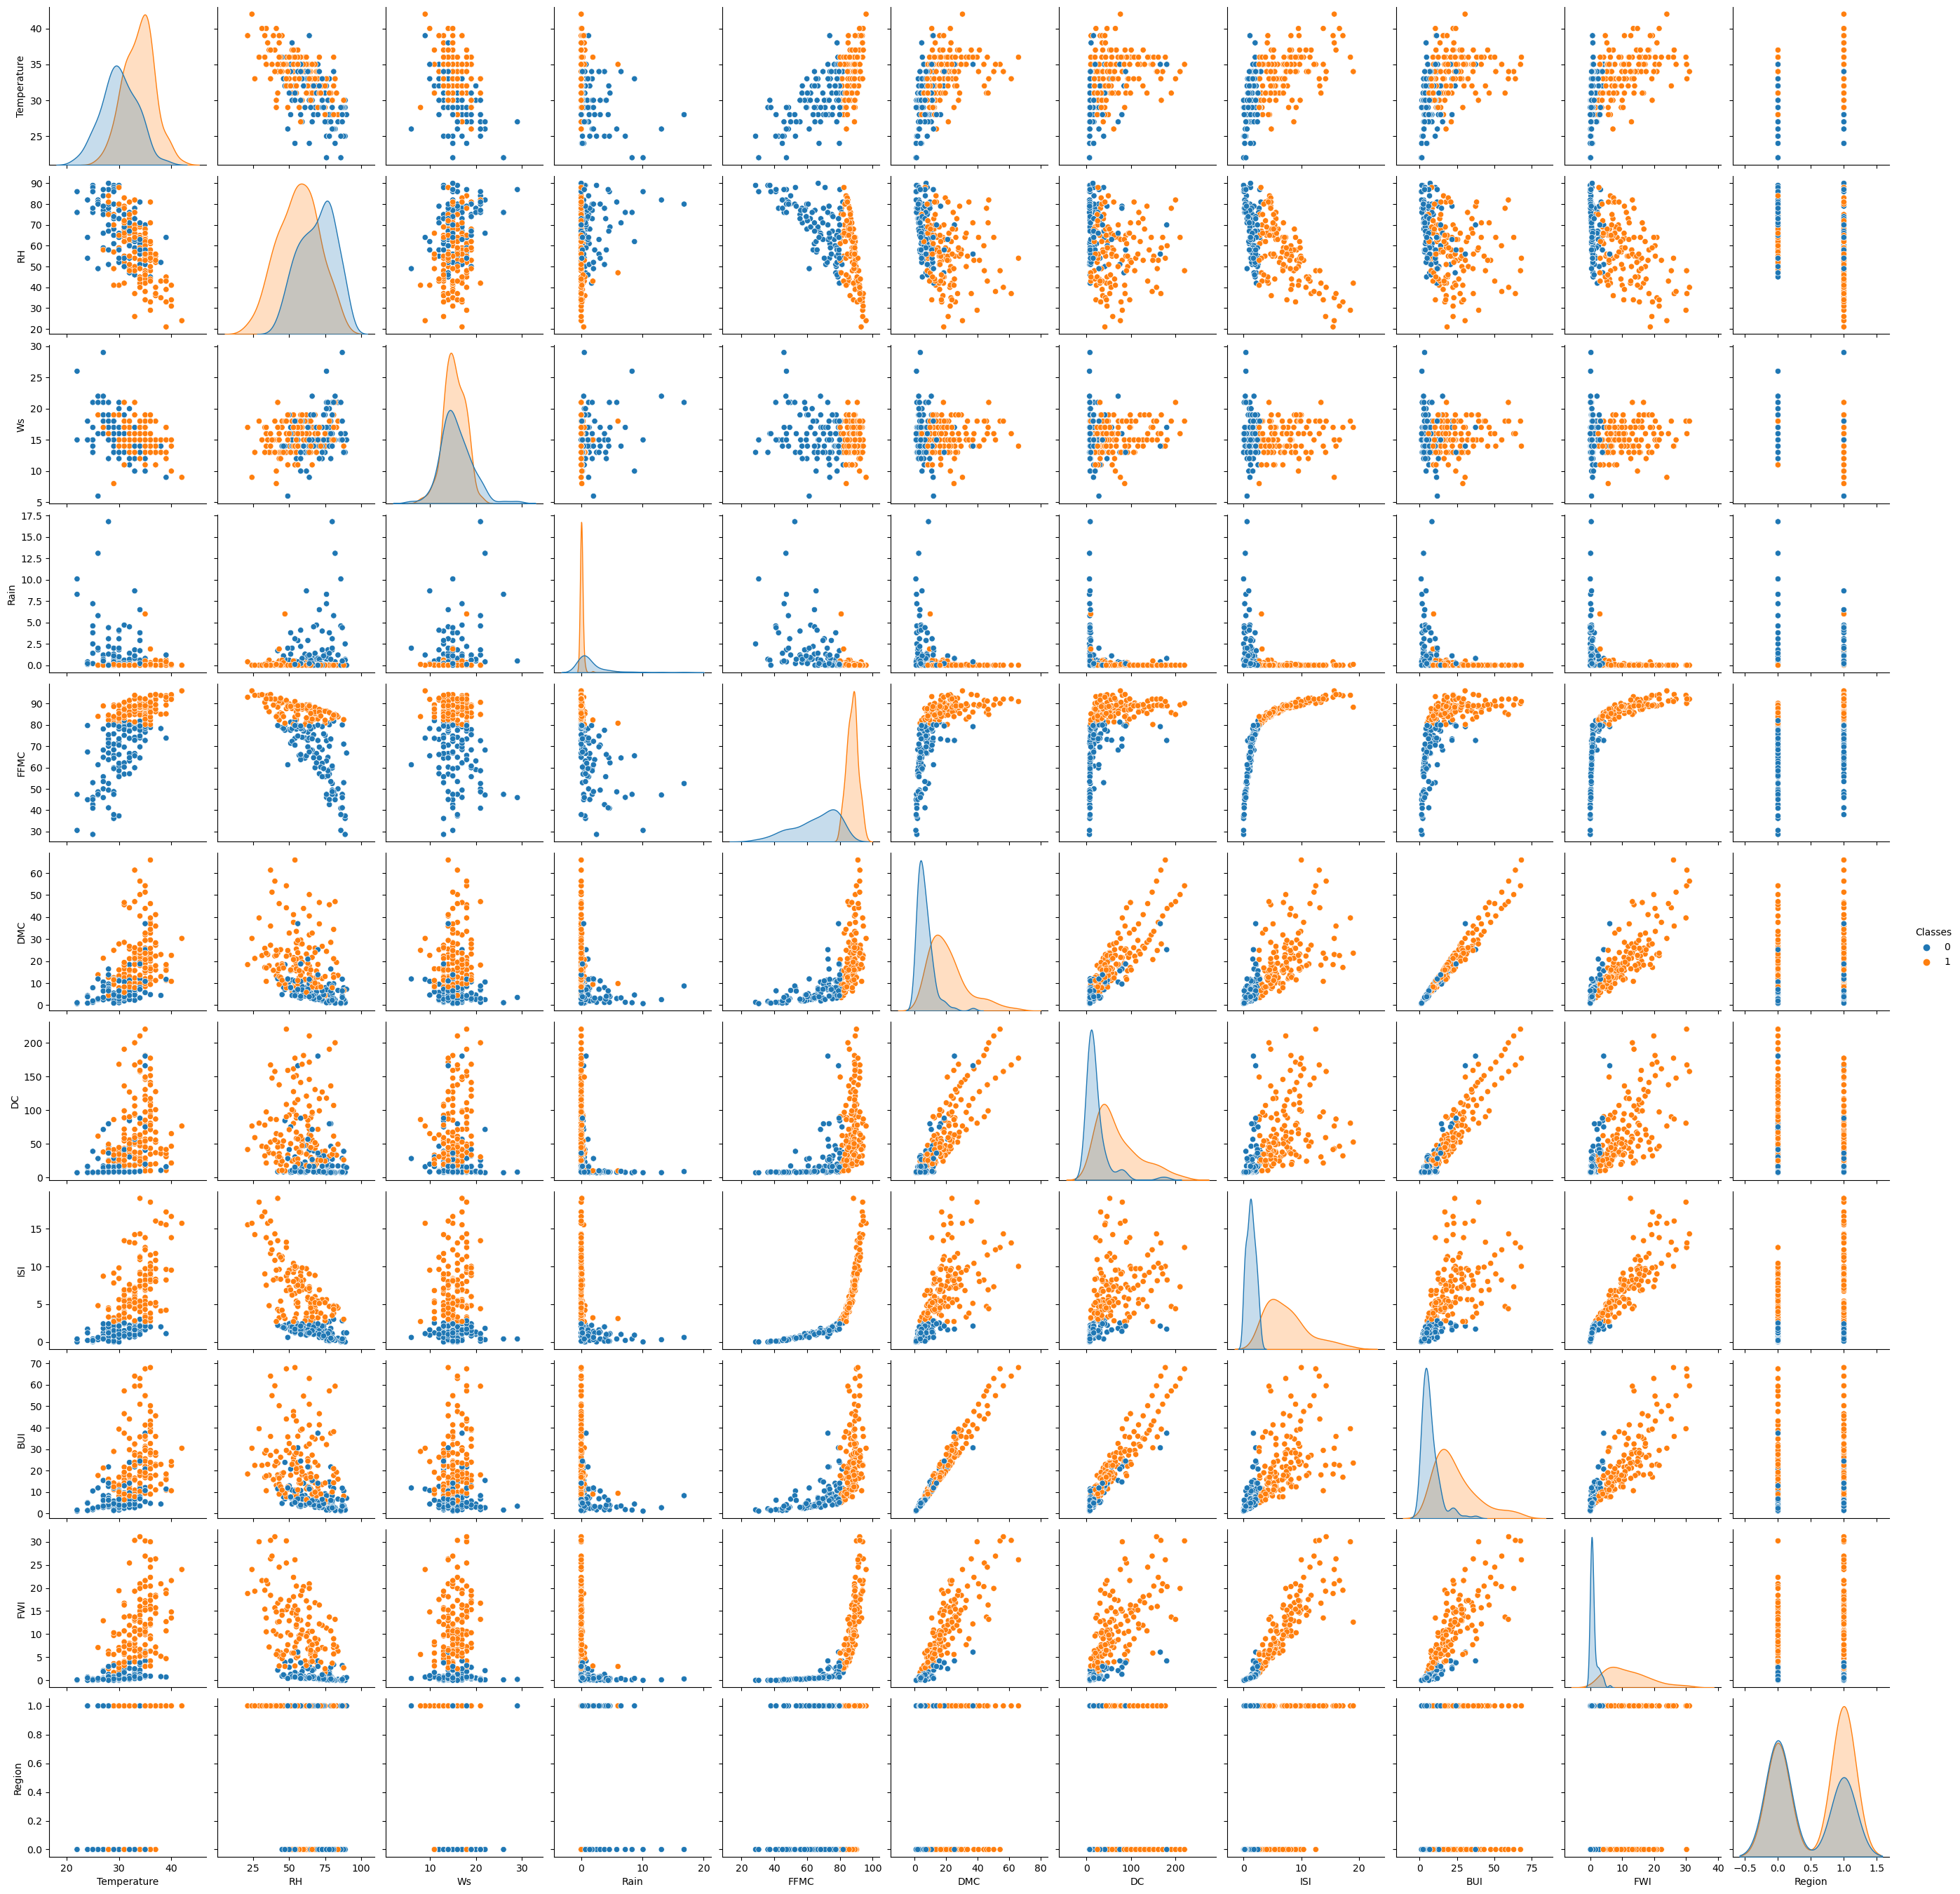

In [192]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming  DataFrame and 'Classes' is the column 
sns.pairplot(data, hue='Classes')
plt.show()

# 4.Support Vector Machines Model

In [193]:
from sklearn.svm import SVC
#Building and training our model
clf = SVC(kernel='linear')
svc_clf = clf.fit(x_train, y_train)

In [194]:
#Predict the response for test dataset
y_pred = svc_clf.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9795918367346939


In [195]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        23
           1       1.00      0.96      0.98        26

    accuracy                           0.98        49
   macro avg       0.98      0.98      0.98        49
weighted avg       0.98      0.98      0.98        49



In [196]:
import pandas as pd

# Convert the NumPy array to a DataFrame (assuming it has column names)
x_train_df = pd.DataFrame(x_train, columns=['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes'])

# Now you can use x_train_df as a DataFrame with column names
print(x_train_df.columns)


Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes'],
      dtype='object')


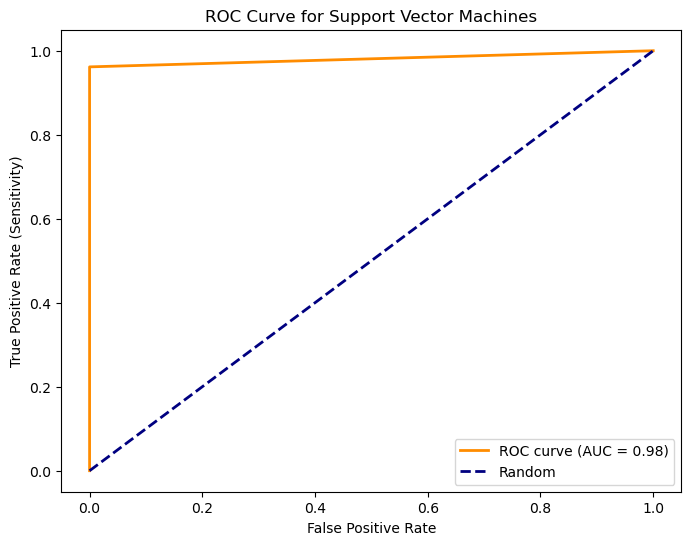

In [197]:

# Compute ROC curve and area under the curve (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve for Support Vector Machines')
plt.legend(loc='lower right')
plt.show()


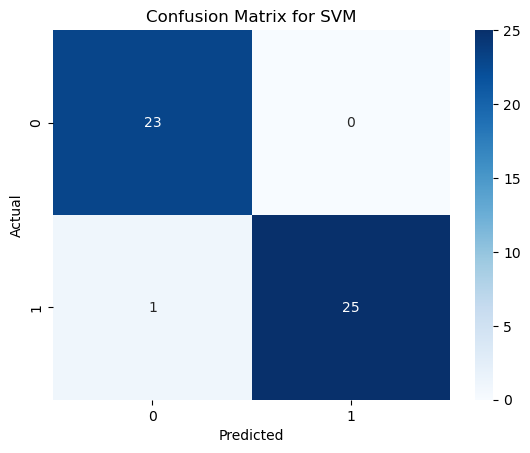

[[23  0]
 [ 1 25]]


In [198]:
cm=confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Confusion Matrix for SVM')
plt.show()
print(cm)

# 5.RandomForest Classifier

In [111]:
from sklearn.ensemble import RandomForestClassifier

In [112]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
RF_CLF = clf.fit(x_train, y_train)

In [113]:
#Predict the response for test dataset
y_pred = RF_CLF.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9183673469387755


In [114]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        27
           1       0.85      1.00      0.92        22

    accuracy                           0.92        49
   macro avg       0.92      0.93      0.92        49
weighted avg       0.93      0.92      0.92        49



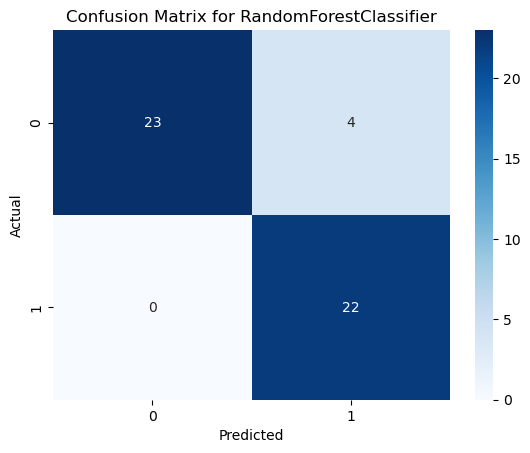

In [115]:
cm=confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

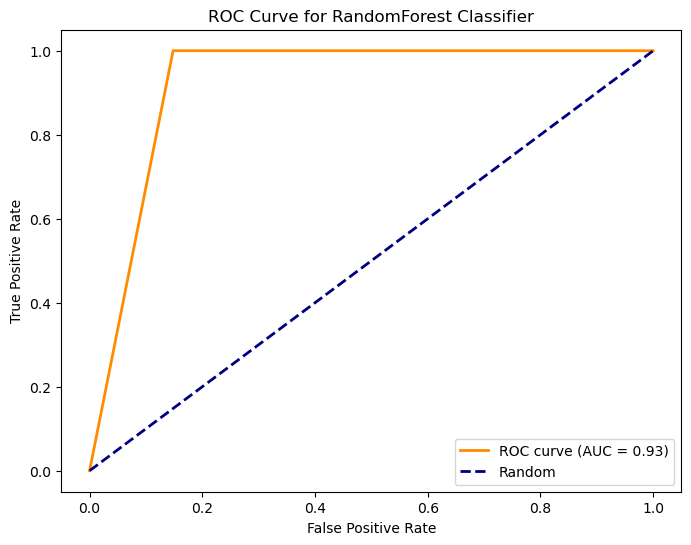

In [116]:


# Compute ROC curve and area under the curve (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for RandomForest Classifier')
plt.legend(loc='lower right')
plt.show()